In [9]:
from myastrotools.tools import PlotObserving
from astropy.coordinates import EarthLocation, SkyCoord
from astropy.time import Time

In [4]:
UTCOffset = 3
#location = EarthLocation.of_site('Las Campanas Observatory')
#time = Time('2022-12-08 00:00:00',scale='utc')+utc_offset
LocationName = 'Las Campanas Observatory'
DateString = '2025-03-15'
SimbadName = 'TYC 1911-715-1'

ax=PlotObserving(SimbadName,DateString,LocationName,UTCOffset,
           plt_style = 'default',
           savefig = False,
           filename = 'observing_plot.png',
           form = 'png',
           dpi = 300,
           figsize=(7, 6),
           cmaps = ['Blues','Oranges','Purples','Reds','Greens'],
           radec = None
                       )

NameError: name 'PlotObserving' is not defined

<Axes: xlabel='Time from 2025-03-14 [UTC]', ylabel='Airmass'>

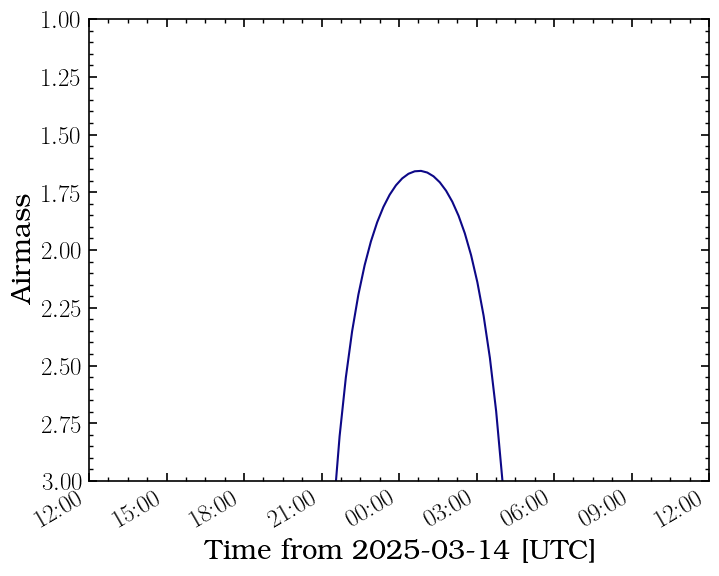

In [8]:
from astroplan import Observer
from astroplan.plots import plot_airmass 

lco = Observer.at_site('Las Campanas Observatory')

from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
obj = FixedTarget.from_name(SimbadName)
from astropy.time import Time
time = Time(DateString+' 00:00:00')
plot_airmass(obj, lco, time) 

        Use get_body("moon") instead. [warnings]


TypeError: unhashable type: 'list'

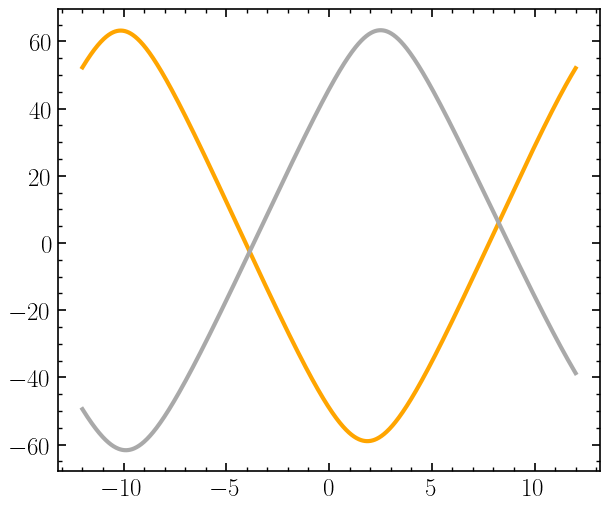

In [15]:
from astropy.coordinates import get_sun, get_moon
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy.time import Time
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

plt_style = 'default',
savefig = False,
filename = 'observing_plot.png',
form = 'png',
dpi = 300,
figsize=(7, 6)
cmaps = ['Blues','Oranges','Purples','Reds','Greens'],
radec = None

utc_offset = UTCOffset*u.hour
location = EarthLocation.of_site(LocationName)

TimeString = DateString + ' 00:00:00'

if SimbadName != None:
    SimbadName = SimbadName.split(',')
    nobs = len(SimbadName)
    #objects = SkyCoord.from_name(SimbadName)
    oblist = []
    for i in range(nobs):
        ob = SkyCoord.from_name(SimbadName[i])
        oblist.append(ob)
else:
    radec = radec.split(',')
    nobs = len(radec)
    oblist = []
    for i in range(nobs):
        ob = SkyCoord(radec[i])
        oblist.append(ob)

midtime = Time(TimeString,scale='utc')+utc_offset
# Establish times:
midnight = midtime
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times = midnight + delta_midnight
# Establish new AltAz frame at given location:
altazframe = AltAz(obstime=times, location=location)
# Sun, Moon, and all inputed object's into AltAz frame:
sunaltazs = get_sun(times).transform_to(altazframe)
moonaltazs = get_moon(times).transform_to(altazframe) 

# Make the plot:
fig = plt.figure(figsize=figsize)
# Plot sun and moon:
plt.plot(delta_midnight, sunaltazs.alt, color='orange', label='Sun')
plt.plot(delta_midnight, moonaltazs.alt, color='darkgrey', label='Moon')

# Plot object(s):
for i,objects in enumerate(oblist):
    obaltazs = objects.transform_to(altazframe)
    plt.scatter(delta_midnight, obaltazs.alt, c=obaltazs.az, cmap=cmaps[i],s=8,lw=0)

plt.fill_between(delta_midnight.value, 0, 90, sunaltazs.alt.value < -0, color='0.5', zorder=0)
plt.fill_between(delta_midnight.value, 0, 90, sunaltazs.alt.value < -18, color='k', zorder=0)
plt.ylim(0,90)
plt.xticks(np.arange(13)*2 -12)
leg = plt.legend(loc='upper left')
plt.colorbar().set_label('Azimuth [deg]')
plt.xlabel('Hours from Local Midnight')  
plt.ylabel('Altitude [deg]')
#plt.annotate(midtime.datetime, xy=(0.14,0.15),xycoords = 'figure fraction',fontsize=8)
plt.grid(ls=':')
plt.show()

In [18]:
obaltazs.alt, 
delta_midnight

<Quantity [-12.        , -11.97597598, -11.95195195, -11.92792793,
           -11.9039039 , -11.87987988, -11.85585586, -11.83183183,
           -11.80780781, -11.78378378, -11.75975976, -11.73573574,
           -11.71171171, -11.68768769, -11.66366366, -11.63963964,
           -11.61561562, -11.59159159, -11.56756757, -11.54354354,
           -11.51951952, -11.4954955 , -11.47147147, -11.44744745,
           -11.42342342, -11.3993994 , -11.37537538, -11.35135135,
           -11.32732733, -11.3033033 , -11.27927928, -11.25525526,
           -11.23123123, -11.20720721, -11.18318318, -11.15915916,
           -11.13513514, -11.11111111, -11.08708709, -11.06306306,
           -11.03903904, -11.01501502, -10.99099099, -10.96696697,
           -10.94294294, -10.91891892, -10.89489489, -10.87087087,
           -10.84684685, -10.82282282, -10.7987988 , -10.77477477,
           -10.75075075, -10.72672673, -10.7027027 , -10.67867868,
           -10.65465465, -10.63063063, -10.60660661, -10.58258